In [ ]:
# importing all the neccessary module
import pandas as pd  # reading files
import numpy as np
import matplotlib.pyplot as plt # ploting data in graphs
%matplotlib inline 

In [ ]:
dataset_url = "http://bit.ly/w-data"

In [ ]:
df = pd.read_csv(dataset_url) #extracting dataset from web
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.shape #printing the shape of the dataset

(25, 2)

In [ ]:
df.info() #printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.isna().sum() #finding the count of missing values from different columns

Hours     0
Scores    0
dtype: int64

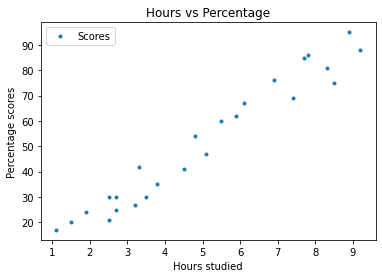

In [ ]:
# plotting the data in 2-D to understand the distribution of data and the relation between houres studied and scores.
df.plot(x='Hours', y='Scores', style='.')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scores')
plt.show()

In [ ]:
#creating X and Y
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [ ]:
#spliting the data in training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25, random_state=355)

In [ ]:
# training the data using Linear Regression algorithm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.2120475032193383
[9.43411075]


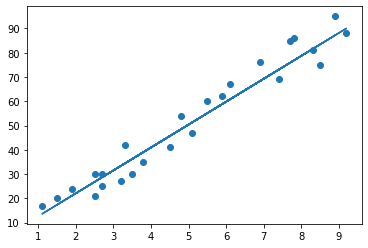

In [ ]:
line = lm.intercept_ + lm.coef_*X
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

In [ ]:
#predicting students score using predict model
from numpy.random import randn
from pandas import Series
y_pred = lm.predict(X_test)
print(X_test)
df1 = pd.DataFrame({'Actual' : Y_test, 'predicted' : y_pred})
df1

[[5.5]
 [8.9]
 [7.7]
 [3.5]
 [1.5]
 [5.9]
 [2.5]]


,Actual,predicted
0,60,55.099657
1,95,87.175633
2,85,75.854700
3,30,36.231435
4,20,17.363214
5,62,58.873301
6,30,26.797324


In [ ]:
# student score at given time prediction
hours = 9.25
h_pred = round(lm.predict([[9.25]]) [0],2)
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(h_pred))

No. of Hours = 9.25
Predicted Score = 90.48


In [ ]:
# Mean error
from sklearn import metrics
print('Mean Absulate Error:',
      metrics.mean_absolute_error(Y_test, y_pred))

Mean Absulate Error: 5.2953723197678
